# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

### Converting the data from CSV to a dataframe and taking an general overview on the data

In [4]:
origin_dataframe = pd.read_csv("tmdb-movies.csv",index_col="id")
origin_dataframe.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Checking if there are any missing data and data types

In [5]:
# Checking the original number if rows
origin_dataframe.shape[0]

10866

In [6]:
# Found that there are missing values
origin_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

In [7]:
#Printing statistical summaries
origin_dataframe.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# Checking duplicates
origin_dataframe.duplicated().sum()

1

## Data Cleaning

In [9]:
# Taking a copy of the dataset for the exploration
copyDF = origin_dataframe.copy()

## Removing unnessassary data

In [10]:
#Drop dublicates
copyDF.drop_duplicates(inplace=True)

In [11]:
#Drop unnessassary columns
copyDF.drop(columns=["homepage","overview","imdb_id",'tagline'],inplace=True)

In [12]:
#Handling null values
copyDF.fillna(value="",inplace=True)

In [13]:
# Checking non-null values
copyDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 135397 to 22293
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10865 non-null  object 
 5   director              10865 non-null  object 
 6   keywords              10865 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10865 non-null  object 
 9   production_companies  10865 non-null  object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
 14  budget_adj            10865 non-null  float64
 15  revenue_adj   

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What are the top 5 popular movies between 1969-2015)

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
top5 = copyDF.sort_values(ascending=False,by="popularity")[0:5]
top5["original_title"]

id
135397             Jurassic World
76341          Mad Max: Fury Road
157336               Interstellar
118340    Guardians of the Galaxy
262500                  Insurgent
Name: original_title, dtype: object

### Plot

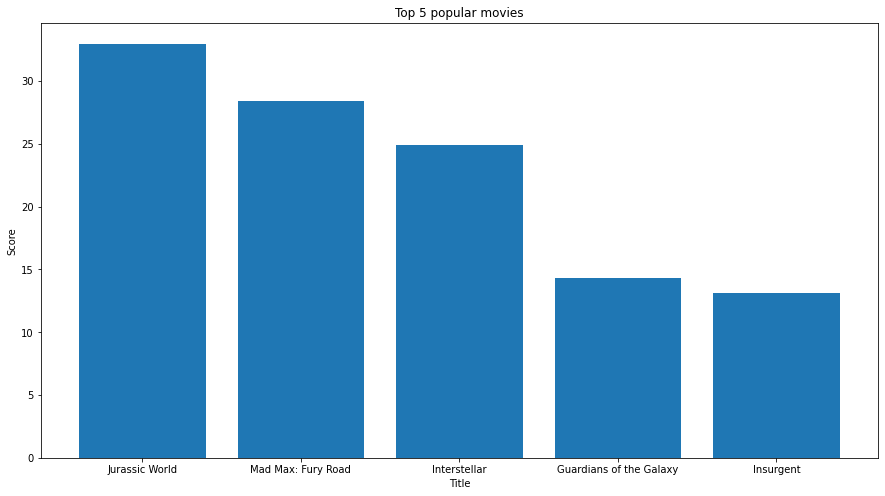

In [19]:
plt.bar(range( 5), top5["popularity"], tick_label= top5["original_title"]);
plt.gcf().set_size_inches(15, 8);
plt.title("Top 5 popular movies");
plt.xlabel("Title");
plt.ylabel("Score")
plt.show()

### Research Question 2  (Between 1960-2015, What year has the most revenu? What years are the top 5 in revenu?)

In [20]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
groupedDF = copyDF.groupby(by="release_year").sum()
groupedDF = groupedDF.sort_values(by="revenue",ascending=False)[0:5]
groupedDF

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,
2015,648.283099,7596547557,26762450518,60620,182422,3702.1,6.988821e+09,2.462144e+10
2013,413.606395,9236038361,24703633017,63293,214486,3875.3,8.645240e+09,2.312342e+10
2012,357.031964,8274084052,24668428824,57607,183539,3410.3,7.858264e+09,2.342870e+10
2014,621.087887,7923990138,24331150183,68832,206262,4144.5,7.298716e+09,2.241120e+10
2011,364.537424,9018153652,23695591578,52878,135439,3217.6,8.742180e+09,2.297046e+10


### Plot 

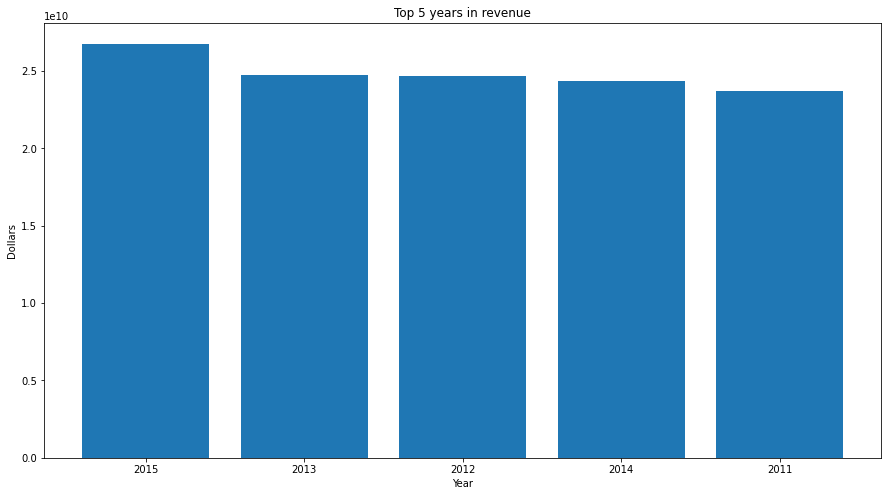

In [21]:
plt.bar(range( 5), groupedDF["revenue"], tick_label=groupedDF.index);
plt.gcf().set_size_inches(15, 8);
plt.title("Top 5 years in revenue");
plt.xlabel("Year");
plt.ylabel("Dollars")
plt.show()

<a id='conclusions'></a>
## Conclusions

* Year ***2015*** is the year with the most revenue from movies in the range between 1960-2015.
* Top 5 years in revenue are in order ***2015-2013-2012-2014-2011***.
* The most popular movie from 1960 to 2015 is ***Jurassic World***.